In [2]:
%matplotlib inline

import os
import h5py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm

from analysis.plots.utils import get_colors
from analysis.processing.hd import get_corrected_HD_angle
from analysis.adapters.hdf5 import H5NAMES

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Get sessions

In [4]:
COLORS = get_colors()

source = '/home/andrey/storage2/andrey/data/processed'
assets = '/home/andrey/storage2/andrey/data/projects/24_shift/assets'
reports_folder = '/home/andrey/storage2/andrey/data/projects/24_shift/reporting'

animals = ['003281', '003282', '003908', '003909', '005363', '005364']

In [5]:
animal = '003909'
sessionpath = os.path.join(source, '003909', '2020-03-29_12-37-34')
h5path = os.path.join(sessionpath, '%s.h5' % H5NAMES.filebase)

with h5py.File(h5path, 'r') as f:
    traj = np.array(f['animal_trajectory'])
    velocity = np.array(f['velocity'])
    
len(traj)

117309

### Distribusion of recorded HD values

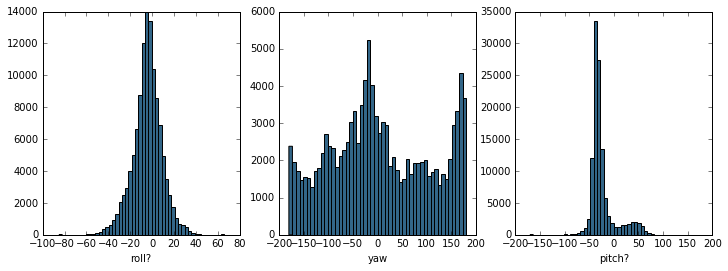

In [5]:
fig = figure(figsize=(12, 4))

for i, label in enumerate(['roll?', 'yaw', 'pitch?']):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_xlabel(label)
    res = ax.hist(traj[:, i + 4], 50, color=COLORS['a'])

### Compute single paths and recorded / decoded HD for a single session

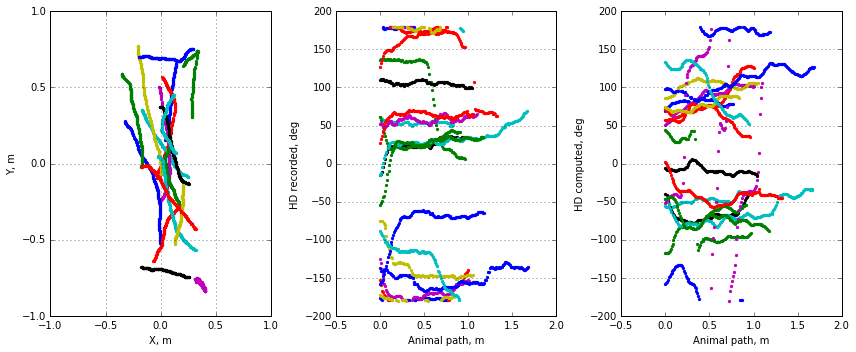

In [8]:
fig = figure(figsize=(12, 5))
ax1 = fig.add_subplot(131)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_xlabel('X, m')
ax1.set_ylabel('Y, m')
ax1.grid()

ax2 = fig.add_subplot(132)
ax2.set_ylim(-200, 200)
ax2.set_xlabel('Animal path, m')
ax2.set_ylabel('HD recorded, deg')
ax2.grid(axis='y')

ax3 = fig.add_subplot(133)
ax3.set_ylim(-200, 200)
ax3.set_xlabel('Animal path, m')
ax3.set_ylabel('HD computed, deg')
ax3.grid(axis='y')

get_corrected_HD_angle(sessionpath, H5NAMES.filebase, [ax1, ax2, ax3])
fig.tight_layout()

### Decoded HD for all sessions / animals

In [9]:
collected = []
animals = ['002784', '003281', '003282', '003908', '003909', '005363', '005364']  # Ignore '00908', '00910'
#animals = ['003282']
colors = plt.rcParams["axes.prop_cycle"]()

for i, animal in enumerate(animals):
    color = next(colors)["color"]
    
    for session in os.listdir(os.path.join(source, animal)):
        sessionpath = os.path.join(source, animal, session)
        h5path = os.path.join(sessionpath, '%s.h5' % H5NAMES.filebase)

        if not os.path.isdir(sessionpath) or not os.path.exists(h5path):
            continue

        with h5py.File(h5path, 'r') as f:
            try:
                angle_delta = int(f[H5NAMES.hd].attrs[H5NAMES.hd_angle_delta_weight_avg])
            except:
                print("No HD data for %s" % sessionpath)
            
        date_index = int(session.replace('-', '').replace('_', ''))
        collected.append([date_index, angle_delta, i])

282
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-11-26_14-52-16
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-11-27_14-49-29
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-11-27_22-17-07
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-11-30_13-51-14
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-12-01_16-35-13
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-12-02_15-11-01
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-12-04_23-38-32
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-12-04_22-50-39
No HD data for /home/andrey/storage2/andrey/data/processed/003282/2019-12-05_13-42-54


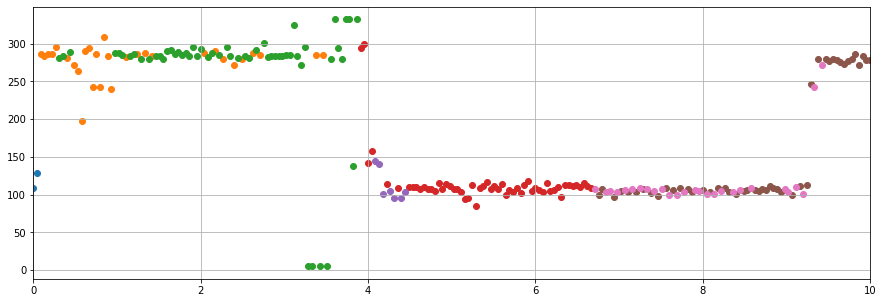

In [8]:
to_plot = np.array(collected)
to_plot = to_plot[to_plot[:, 0].argsort()]

colors = plt.rcParams["axes.prop_cycle"]()
fig = figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.set_xlim(0, 10)
ax.grid()

x_vals = np.array([[x] for x in np.linspace(0, 10, len(to_plot))])
to_plot = np.hstack((to_plot, x_vals))

for i in np.unique(to_plot[:, 2]):
    color=next(colors)["color"]
    ax.scatter(to_plot[to_plot[:, 2] == i][:, 3], to_plot[to_plot[:, 2] == i][:, 1] % 360, color=color)
